In [15]:
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from statistics import mean 
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score,accuracy_score, confusion_matrix, f1_score

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

encoder = preprocessing.LabelEncoder()

both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

#print('Shape both:\t{}\n'.format(both_df.shape))

def get_train_test_data(a):
    tr_df=both_df[(both_df.subject != a[0])&(both_df.subject != a[1])
                     &(both_df.subject != a[2])&(both_df.subject != a[3])
                     &(both_df.subject != a[4])]
    
    te_df=both_df.loc[both_df['subject'].isin([a[0],a[1],a[2],a[3],a[4]])]
                                           
    return tr_df,te_df
                     

def get_label(t):
    return t.Activity.values    
    
def drop_label(t):
    return t.drop('Activity' , axis=1).values

def encode_label(e):
    encoder.fit(e)
    return encoder.transform(e)                                          

    
#print('Shape Train:\t{}'.format(train_df.shape))
#print('Shape Test:\t{}\n'.format(test_df.shape))


# encoding train test labels

#y_score = classifier.predict_proba(test_data_without_label)
                                              
                                        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



def get_acc_recall_prec_f1_score_and_confusion_mat(a):
    
    classifier =RandomForestClassifier(n_estimators=50,  n_jobs=4, min_samples_leaf=20)

    train,test=get_train_test_data(a)
    
    train_label=get_label(train)
    test_label=get_label(test)
    
    train_data_without_label=drop_label(train)
    test_data_without_label=drop_label(test)
    
    encoded_label_of_train_data=encode_label(train_label)
    classifier.fit(train_data_without_label, encoded_label_of_train_data)
    
    
    encoded_label_of_test_data=encode_label(test_label)
    y_te_pred = classifier.predict(test_data_without_label)
    
    acc1 = accuracy_score(encoded_label_of_test_data, y_te_pred)
    prec1 = precision_score(encoded_label_of_test_data, y_te_pred, average="macro")
    rec1 = recall_score(encoded_label_of_test_data, y_te_pred, average="macro")
    F1_score1= f1_score(encoded_label_of_test_data, y_te_pred, average="macro")
    
    print("Accuracy: %3.5f, Precision: %3.5f, Recall: %3.5f, f1_score: %3.5f" % (acc1, prec1, rec1,F1_score1))
    
    cfs = confusion_matrix(encoded_label_of_test_data, y_te_pred)
    plt.figure()
    class_names = encoder.classes_
    plot_confusion_matrix (cfs, classes=class_names,
                          title='RandomForest Confusion Matrix, without normalization')
    
    return acc1,prec1,rec1,F1_score1
    


persons that are kept for testing:	[1, 2, 3, 4, 5]

Accuracy: 0.92231, Precision: 0.92566, Recall: 0.92055, f1_score: 0.92003
Confusion matrix, without normalization


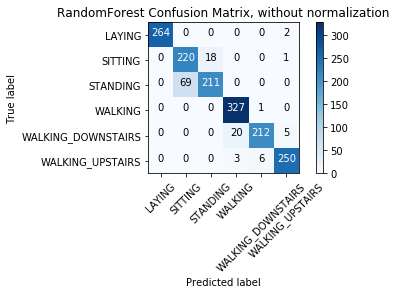

In [16]:
a=[1,2,3,4,5]
print('persons that are kept for testing:\t{}\n'.format(a))
acc1,prec1,rec1,f1=get_acc_recall_prec_f1_score_and_confusion_mat(a)

persons that are kept for testing:	[6, 7, 8, 9, 10]

Accuracy: 0.90709, Precision: 0.90878, Recall: 0.90675, f1_score: 0.90527
Confusion matrix, without normalization


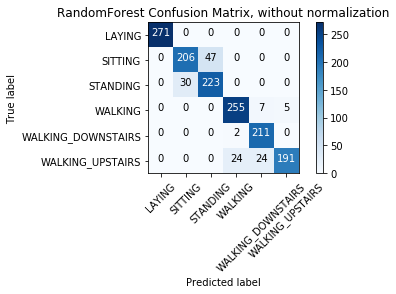

In [18]:
a=[6,7,8,9,10]
print('persons that are kept for testing:\t{}\n'.format(a))

acc2,prec2,rec2,f2=get_acc_recall_prec_f1_score_and_confusion_mat(a)



persons that are kept for testing:	[11, 12, 13, 14, 15]

Accuracy: 0.92689, Precision: 0.93114, Recall: 0.92596, f1_score: 0.92610
Confusion matrix, without normalization


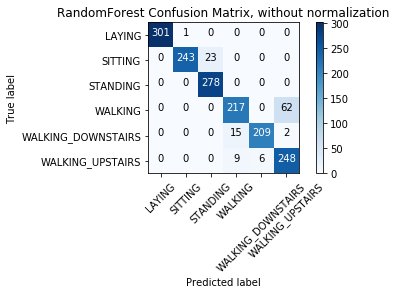

In [19]:
a=[11,12,13,14,15]
print('persons that are kept for testing:\t{}\n'.format(a))

acc3,prec3,rec3,f3=get_acc_recall_prec_f1_score_and_confusion_mat(a)

persons that are kept for testing:	[16, 17, 18, 19, 20]

Accuracy: 0.88907, Precision: 0.88328, Recall: 0.88059, f1_score: 0.88019
Confusion matrix, without normalization


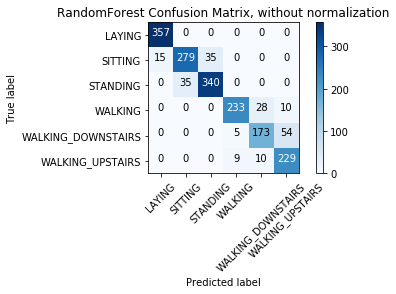

In [20]:
a=[16,17,18,19,20]
print('persons that are kept for testing:\t{}\n'.format(a))

acc4,prec4,rec4,f4=get_acc_recall_prec_f1_score_and_confusion_mat(a)

persons that are kept for testing:	[21, 22, 23, 24, 25]

Accuracy: 0.93231, Precision: 0.92868, Recall: 0.92525, f1_score: 0.92572
Confusion matrix, without normalization


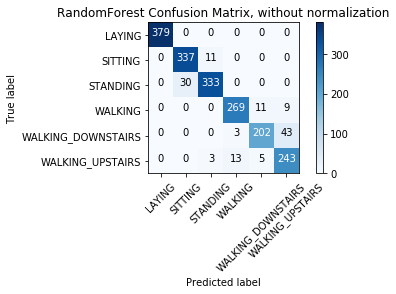

In [21]:

a=[21,22,23,24,25]
print('persons that are kept for testing:\t{}\n'.format(a))

acc5,prec5,rec5,f5=get_acc_recall_prec_f1_score_and_confusion_mat(a)

persons that are kept for testing:	[26, 27, 28, 29, 30]

Accuracy: 0.95738, Precision: 0.95866, Recall: 0.95876, f1_score: 0.95868
Confusion matrix, without normalization


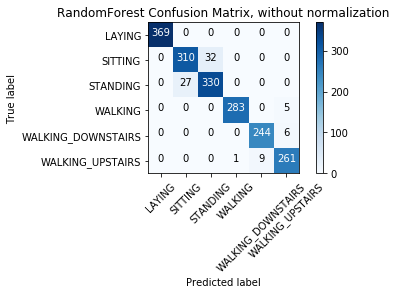

In [22]:

a=[26,27,28,29,30]
print('persons that are kept for testing:\t{}\n'.format(a))

acc6,prec6,rec6,f6=get_acc_recall_prec_f1_score_and_confusion_mat(a)

In [23]:

accuracy=[acc1,acc2,acc3,acc4,acc5,acc6]
precession=[prec1,prec2,prec3,prec4,prec5,prec6]
recall=[rec1,rec2,rec3,rec4,rec5,rec6]
f1_score=[f1,f2,f3,f4,f5,f6]

print('Average accuracy:\t{}\n'.format(mean(accuracy)))
print('Average precision score:\t{}\n'.format(mean(precession)))
print('Average recall score:\t{}\n'.format(mean(recall)))
print('Average F1 score:\t{}\n'.format(mean(f1_score)))

Average accuracy:	0.9225083102902182

Average precision score:	0.9227006860342337

Average recall score:	0.9196416244653032

Average F1 score:	0.9193314830652599

